In [1]:
#import relevant packages
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect
from password import pw

#Add this line to get rid of warning messages
pd.options.mode.chained_assignment = None  # default='warn'

ModuleNotFoundError: No module named 'password'

## Data Extraction 

In [3]:
#AP Start 18Dec2022--
mass_shooting2014_new=pd.read_csv("./Resources/Mass_Shooting_2014_new.csv")
mass_shooting2015_new=pd.read_csv("./Resources/Mass_Shooting_2015_new.csv")
mass_shooting2016_new=pd.read_csv("./Resources/Mass_Shooting_2016_new.csv")
mass_shooting_other=pd.read_csv("./Resources/mass_shooting_all.csv")
#AP End--
mass_shooting2017=pd.read_csv("./Resources/mass_shootings_2017.csv")
mass_shooting2018=pd.read_csv("./Resources/mass_shootings_2018.csv")
mass_shooting2019=pd.read_csv("./Resources/mass_shootings_2019.csv")

teens_injured=pd.read_csv("./Resources/Teens injured.csv")
teens_killed=pd.read_csv("./Resources/Teens killed.csv")

children_injured=pd.read_csv("./Resources/Children injured.csv")
children_killed=pd.read_csv("./Resources/Children killed.csv")

mass_shooting_other.tail()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
1995,1537992,"October 30, 2019",Pennsylvania,Philadelphia,5026 Walton Ave,4,0,NaN
1996,1537044,"October 29, 2019",Maryland,Baltimore,4700 block of Liberty Heights Ave,1,3,NaN
1997,1537672,"October 29, 2019",California,Long Beach,2709 E 7th St,3,9,NaN
1998,1536787,"October 28, 2019",Maryland,Baltimore,4160 Pimlico Rd,1,3,NaN
1999,1536706,"October 27, 2019",Michigan,Detroit,East Outer Dr and Helen St,0,4,NaN


## Transforming of mass shooting data

In [4]:
#Anshuman 18Dec2022 
#Concating MasterData for Mass Shooting
master_data=[mass_shooting2014_new,mass_shooting2015_new,mass_shooting2016_new,mass_shooting2017,mass_shooting2018,mass_shooting2019,mass_shooting_other]
master_data_df=pd.concat(master_data)
#Test Code: master_data_df.tail()

#Diplay record recound for each column
#Test Code: master_data_df.count()

#Delete Duplicate
#No column parameter are passed meaning all column should be used to identify duplicates 
master_data_stage1_df=master_data_df.drop_duplicates()
#Test Code: master_data_stage1_df.count()

#master_data_stage2_df - Dropping unnecessary column
master_data_stage2_df=master_data_stage1_df.drop("Operations",axis=1)
#Test Code: master_data_stage2_df.head()

#Test Code: master_data_stage2_df.count()

#Dropping null values 
master_data_stage3_df =master_data_stage2_df.dropna(axis='rows')
#Test Code: master_data_stage3_df.count()

#master_data_stage3_df['Date_formatted'] = pd.to_datetime(master_data_stage3_df['Incident Date'])
#master_data_stage3_df


#Formatting Incident Date
master_data_stage3_df['Incident Date Formatted']=pd.to_datetime(master_data_stage3_df.loc[:,"Incident Date"])
#Test Code: master_data_stage3_df

#Dropping column Incident Date
master_data_stage4_df=master_data_stage3_df.drop("Incident Date",axis=1)
#Test Code: master_data_stage4_df.head()

#Renaming column Incident Date Formatte to incident date 
master_data_stage5_df=master_data_stage4_df.rename(columns=
                                            {"Incident ID":"Incident_ID" ,
                                             "Incident Date Formatted":"Incident_Date" ,
                                             "City Or County":"City_County",
                                             "# Killed":"Killed",
                                             "# Injured":"Injured"
                                            })

#Origanising columns 
master_data_stage6_df= master_data_stage5_df[["Incident_ID","Incident_Date","State","City_County","Address","Killed","Injured"]]

#Setting Index
master_data_stage6_df.set_index("Incident_ID",inplace=True)

#Test Code: master_data_stage6_df

#Copying DF to a final DF
master_data_stage_final_df = master_data_stage6_df
master_data_stage_final_df.head()


C:\Users\maris\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Incident_Date,State,City_County,Address,Killed,Injured
Incident_ID,,,,,,
271363,2014-12-29,Louisiana,New Orleans,Poydras and Bolivar,0,4
269679,2014-12-27,California,Los Angeles,8800 block of South Figueroa Street,1,3
270036,2014-12-27,California,Sacramento,4000 block of May Street,0,4
269167,2014-12-26,Illinois,East St. Louis,2500 block of Summit Avenue,1,3
268598,2014-12-24,Missouri,Saint Louis,18th and Pine,1,3


## Transforming Teens Casualities 

In [5]:
#Remove irrelevant columns:
del teens_injured['Operations']
del teens_killed['Operations']

#Code RM101 is commented becasue  
# 1. Records seem accurate, as the number of killed and injured seem identical across the 2 csv files (killed and injured).
# 2. Hence, can drop the entire rows of duplicates.
# 3. NO NEED TO KEEP Record_type for the combined files, as the record_type can be found from the Killed and/or the Injured column.
#---------------RM101 Start-----------------------------------------------
#assign record type before concatenating 2 csv files into 1 dataframe
#teens_injured['Record_type']='I'
#teens_killed['Record_type']='K'
#---------------RM101 End-------------------------------------------------

###Concatenate teens_injured and teens_killed into teen_casualty:
teen_casualty_list=[teens_injured,teens_killed]
teen_casualty=pd.concat(teen_casualty_list)
teen_casualty.rename(columns={'Incident ID': 'Incident_ID','City Or County':'City_County',
                             '# Killed':'Killed','# Injured':'Injured'},inplace=True)
teen_casualty.head()

#Find duplicate Incident_IDs after concatenation
find_duplicateIncident_ID_teen=teen_casualty['Incident_ID'].duplicated()
teen_casualty.loc[find_duplicateIncident_ID_teen,:]

#Investigate a couple of duplicates Incident ID:
#teen_casualty.loc[teen_casualty['Incident_ID']==2478963]
#teen_casualty.loc[teen_casualty['Incident_ID']==2314819]

teen_casualty['Incident_Date']=pd.to_datetime(teen_casualty.loc[:,'Incident Date'])
del teen_casualty['Incident Date']
teen_casualty.drop_duplicates('Incident_ID',inplace=True)
teen_casualty.set_index('Incident_ID',inplace=True)

teen_casualty_final_df= teen_casualty[["Incident_Date","State","City_County","Address","Killed","Injured"]]
teen_casualty_final_df.head()


,Incident_Date,State,City_County,Address,Killed,Injured
Incident_ID,,,,,,
2479242,2022-12-12,Minnesota,Minneapolis,Fremont Ave N and N 26th Ave,0,1
2479026,2022-12-12,Texas,San Antonio,2100 block of Texas Ave,0,1
2479206,2022-12-12,Pennsylvania,Philadelphia,5300 block of Jackson St,1,1
2479782,2022-12-12,Oregon,Portland,3400 SE 26th Ave,0,1
2479386,2022-12-12,Kentucky,Louisville,4801 Outer Loop,0,1


## Transforming Children Casualities 

In [6]:
children_casualty_list=[children_injured,children_killed]
children_casualty=pd.concat(children_casualty_list)
children_casualty.rename(columns={'Incident ID': 'Incident_ID',
                                  'City Or County':'City_County',
                                  '# Killed':'Killed','# Injured':'Injured'},inplace=True)
del children_casualty['Operations']
children_casualty['Incident_Date']=pd.to_datetime(children_casualty.loc[:,'Incident Date'])
del children_casualty['Incident Date']
children_casualty.drop_duplicates('Incident_ID',inplace=True)
children_casualty.set_index('Incident_ID',inplace=True)
children_casualty

,State,City_County,Address,Killed,Injured,Incident_Date
Incident_ID,,,,,,
2479461,California,Clovis,Minnewawa Ave and W Bullard Ave,0,1,2022-12-11
2478949,New York,Newburgh,93 Kenny Ct,0,2,2022-12-10
2478579,Alabama,Birmingham,3700 Block of Brooklyn St,0,1,2022-12-10
2478074,Pennsylvania,York,409 E. Philadelphia St,0,3,2022-12-09
2477783,Illinois,Waukegan,500 block of McAlister Ave,0,1,2022-12-08
...,...,...,...,...,...,...
491046,California,Oakland,3400 block of Wilson Avenue,1,3,2013-07-17
490245,Texas,Fort Worth,2900 block of Pate Drive,4,0,2013-07-01
485811,Illinois,Manchester,East Street,6,1,2013-04-24


## Visualisation for rendering to HTML

In [7]:
#import packages for visualisations
import matplotlib.pyplot as plt

In [8]:
df_children_summary=children_casualty.groupby('State').sum()

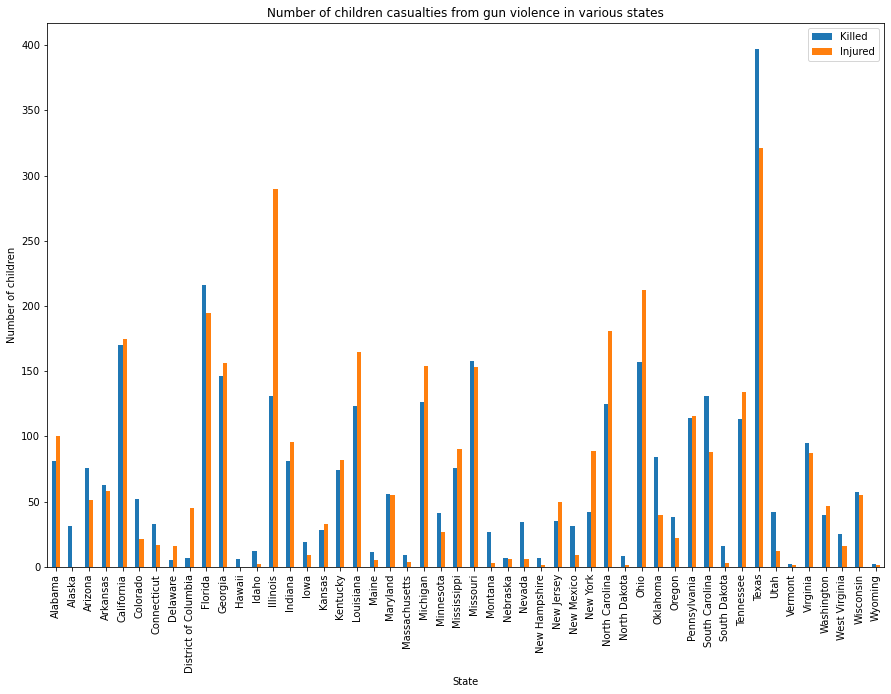

In [9]:
df_children_summary.plot(kind='bar', figsize=(15,10))
plt.title('Number of children casualties from gun violence in various states')
plt.ylabel('Number of children')
plt.savefig('PlotChildrenCasualties.png')
plt.show()

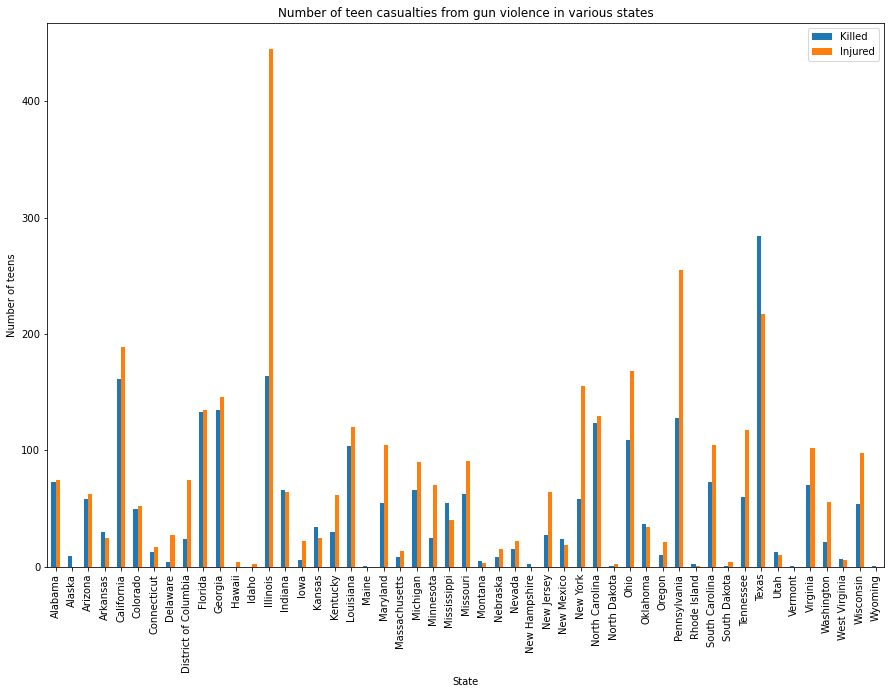

In [10]:
df_teen_summary=teen_casualty_final_df.groupby('State').sum()
df_teen_summary.plot(kind='bar', figsize=(15,10))
plt.title('Number of teen casualties from gun violence in various states')
plt.ylabel('Number of teens')
plt.savefig('PlotTeenCasualties.png')
plt.show()

In [11]:
children_casualty.head()

,State,City_County,Address,Killed,Injured,Incident_Date
Incident_ID,,,,,,
2479461,California,Clovis,Minnewawa Ave and W Bullard Ave,0,1,2022-12-11
2478949,New York,Newburgh,93 Kenny Ct,0,2,2022-12-10
2478579,Alabama,Birmingham,3700 Block of Brooklyn St,0,1,2022-12-10
2478074,Pennsylvania,York,409 E. Philadelphia St,0,3,2022-12-09
2477783,Illinois,Waukegan,500 block of McAlister Ave,0,1,2022-12-08


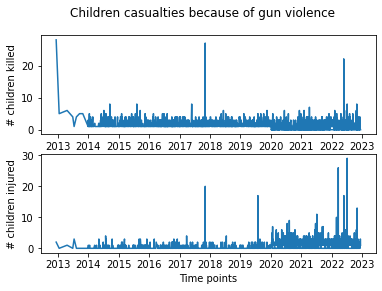

In [27]:
fig, axs = plt.subplots(2,1)
fig.suptitle('Children casualties because of gun violence')
axs[0].plot(children_casualty['Incident_Date'], children_casualty['Killed'])
axs[1].plot(children_casualty['Incident_Date'],children_casualty['Injured'])

axs[1].set_xlabel('Time points')
axs[0].set_ylabel('# children killed')
axs[1].set_ylabel('# children injured')

plt.savefig('Gun violence_Children casualties over time.png')
plt.show()

#### Number of children injured (but not killed) seem to have increased in recent years.